# Project: Advanced Lane Lines
# Author: Chetan Sadhu

Import modules
---

In [1]:
import cv2
import numpy as np
import glob
import pickle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

Camera Calibration
---

In [2]:
# Read all the images
images = glob.glob('camera_cal/calibration*.jpg')

# Initialize object points and image points array
objpoints = []
imgpoints = []

# Chess board dimensions
nx = 9
ny = 6

# Iterate through images
for imageName in images:
    # Read the image
    img = cv2.imread(imageName)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Define Object points
    objp = np.zeros((nx * ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    # Find chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # if corners are found
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        output_filename = 'output_images/' + imageName.split('\\')[-1]
        cv2.imwrite(output_filename, img)

# Calibrate camera
ret, mtx, dist, R, T = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# save data to pickle file
calibration_data = {'mtx':mtx, 'dist':dist}
pickle.dump(calibration_data, open('camera_cal.p', 'wb'))
print ('Calibration is done and data is saved to the file')

Calibration is done and data is saved to the file


Helper functions
---

In [3]:
def HLS_Colorspace(img, disp = 0, save=0):
    '''
        Function to convert from RGB to HLS color space
        img - Image in RGB format
        disp - 0 to not display output, 1 to display output
        save - 0 to not save output, 1 to save output
        returns HLS color space image
    '''
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if disp == 1:
        plt.imshow(hls)
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/hls_image.jpg', hls)
    return hls

def Grayscale(img, disp = 0, save=0):
    '''
        Function to convert from RGB to Grayscale image
        img - Image in RGB format
        disp - 0 to not display output, 1 to display output
        save - 0 to not save output, 1 to save output
        returns grayscale image
    '''
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if disp == 1:
        plt.imshow(gray, cmap='gray')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/grayscale.jpg', gray)
    return gray

def Gradient(img, orient = 'x', thresh = (0, 255), kernel = 3, disp = 0, save=0):
    '''
        Function to find the sobel gradient along one direction and binarize based on threshold
        img - Single channel image
        orient - 'x' for gradient in x-direction and 'y' for gradient in y-direction
        thresh - Binary threshold. Between low and high threshold the value is 1 otherwise 0
        kernel - Sobel gradient kernel
        disp - 0 to not display output, 1 to display output
        save - 0 to not save output, 1 to save output
        returns binary gradient image
    '''
    if orient is 'x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel)
    elif orient is 'y':
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel)
        
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(abs_sobel*255/np.max(abs_sobel))
    if disp == 1:
        plt.imshow(scaled_sobel, cmap='gray')
        plt.show()
    if save == 1 and orient is 'x':
        cv2.imwrite('output_images/sobel_x.jpg', scaled_sobel)
    if save == 1 and orient is 'y':
        cv2.imwrite('output_images/sobel_y.jpg', scaled_sobel)
    binary = np.zeros_like(scaled_sobel)
    binary[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1
    if disp == 1:
        plt.imshow(binary, cmap='gray')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/gradient_binary.jpg', binary*255)
    return binary


def Magnitude(img, thresh = (0, 255), kernel = 3, disp = 0, save=0):
    '''
        Function to find the sobel magnitude along x and y directions and to binarize based on the magnitude threshold
        img - Single channel image
        thresh - Binary threshold. Between low and high threshold the value is 1 otherwise 0
        kernel - Sobel gradient kernel
        disp - 0 to not display output, 1 to display output
        save - 0 to not save output, 1 to save output
        returns binary gradient image
    '''
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel)
    
    mag = np.sqrt(sobel_x**2 + sobel_y**2)
    scaled_mag = np.uint8(mag * 255/np.max(mag))
    if disp == 1:
        plt.imshow(scaled_mag, cmap='gray')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/sobel_magnitude.jpg', scaled_mag)
    binary = np.zeros_like(scaled_mag)
    binary[(scaled_mag > thresh[0]) & (scaled_mag < thresh[1])] = 1
    if disp == 1:
        plt.imshow(binary, cmap='gray')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/magnitude_binary.jpg', binary*255)
    return binary

def Direction(img, thresh = (0, 255), kernel = 3, disp = 0, save=0):
    '''
        Function to obtain the direction of the gradients and to binarize based on the threshold values
        img - Single channel image
        thresh - Binary threshold. Between low and high threshold the value is 1 otherwise 0
        kernel - Sobel gradient kernel
        disp - 0 to not display output, 1 to display output
        save - 0 to not save output, 1 to save output
        returns binary direction image      
    '''
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel)
    abs_x = np.absolute(sobel_x)
    abs_y = np.absolute(sobel_y)
    direction = np.arctan2(abs_y, abs_x)
    binary = np.zeros_like(direction)
    binary[(direction > thresh[0]) & (direction < thresh[1])] = 1
    if disp == 1:
        plt.imshow(binary, cmap='gray')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/direction_binary.jpg', binary*255)
    return binary

Calculation of projection points
---

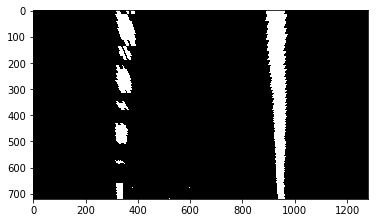

[[  600.   443.]
 [  260.   680.]
 [ 1061.   680.]
 [  682.   443.]]
Projection points are written to the file


In [4]:
# load calibration data for undistortion
pickle_file = pickle.load(open('camera_cal.p', 'rb'))
mtx = pickle_file['mtx']
dist = pickle_file['dist']

def Binarization(img, disp = 0, save = 0):
    '''
        Function to obtain the binary lane image with lane markings identified
        img - Input image in RGB color space undistortedl
        disp - 0 to not display output, 1 to display output
        save - 0 to not save output, 1 to save output
        returns binary image
    '''
    # Extracting R and G channel
    R = img[:,:,0]
    G = img[:,:,1]
    if disp == 1:
        plt.imshow(R, cmap='gray')
        plt.show()
        plt.imshow(G, cmap='gray')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/red_channel.jpg', R)
        cv2.imwrite('output_images/green_channel.jpg', G)
        
    binary_rg = np.zeros_like(R)
    binary_rg[(R > 150) & (G > 130)] = 1
    if disp == 1:
        plt.imshow(binary_rg, cmap='gray')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/combined_r_and_g.jpg', binary_rg*255)
    # conversion to grayscale
    gray = Grayscale(img)
    # extract s-component from hls image
    hls = HLS_Colorspace(img)
    l = hls[:,:,1]
    s = hls[:,:,2]
    if save == 1:
        cv2.imwrite('output_images/s_channel.jpg', s)
    # Gradient in x-direction
    grad_x = Gradient(gray, thresh=(20, 200))
    # Binarization of s-channel alone
    s_binary = np.zeros_like(s)
    s_binary[(s > 100) & (s < 200)] = 1
    # combined image with all the above binary threshold images
    combined = np.zeros_like(gray, dtype=np.uint8)
    combined[((binary_rg == 1)) | (s_binary == 1) | (grad_x == 1)] = 1
    if save == 1:
        cv2.imwrite('output_images/straight_line_combined.jpg', combined*255)
    if disp == 1:
        plt.imshow(combined,cmap='gray')
        plt.show()
    return combined

# Verices for 4 corners of the ROI
a = [575, 443]
b = [200, 680]
c = [1100, 680]
d = [725, 443]

# Image list
images = ['test_images/straight_lines2.jpg']
points = []

for image in images:
    # Read the image in RGB format
    img = mpimg.imread(image)
    # undistort using the calibration
    undist = cv2.undistort(img, mtx, dist, None, None)
    # obtain the binarized image
    combined = Binarization(undist)
    # Mask to select region under ROI and discard others
    vertices = np.array([a, b, c, d], dtype=np.int32)
    mask = np.zeros_like(combined)
    cv2.fillPoly(mask, [vertices], 255)
    masked_image = cv2.bitwise_and(combined, mask)
    height, width = masked_image.shape
    # Find the maximum value in x-direction and the first and last pixels are the corners
    idx1 = np.where((masked_image[a[1],:] == np.max(masked_image)))
    e1 = [idx1[0][0], a[1]]
    e2 = [idx1[0][-1], a[1]]
    idx2 = np.where((masked_image[b[1], :] == np.max(masked_image)))
    e3 = [idx2[0][0], b[1]]
    e4 = [idx2[0][-1], b[1]]
    
    # choose arbitrary x offset and y offset for transformation
    x_offset = 320
    y_offset = 0
    
    # define src and dst points for transformation
    src_points = np.array([e1, e3, e4, e2], dtype=np.float32)
    dst_points = np.array([[x_offset, y_offset], 
                           [x_offset, height-y_offset], 
                           [width-x_offset, height-y_offset], 
                           [width-x_offset, y_offset]], dtype=np.float32)
     
    # Get the perspective transformation matrix and transform the images
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    dst_img = cv2.warpPerspective(masked_image, M, masked_image.shape[::-1], flags=cv2.INTER_NEAREST)
    plt.imshow(dst_img, cmap='gray')
    plt.show()
    cv2.imwrite('output_images/binary_warped_straight_line.jpg', dst_img*255)
    points.append(e1)
    points.append(e3)
    points.append(e4)
    points.append(e2)

# save the projection points to the file
projection_points = np.array([[points[0][0], points[0][1]],
                              [points[1][0], points[1][1]],
                              [points[2][0], points[2][1]],
                              [points[3][0], points[3][1]]], dtype=np.float32)

print (projection_points)
pickle.dump(projection_points, open('transformation_points.p', 'wb'))
print ('Projection points are written to the file')

Line class
---

In [5]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = np.empty((0, 720))
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = np.empty((0, 3))
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None

Lane detection in test images and videos
---

In [6]:
def Binarize(img, disp=0, save=0):
    '''
        Function to obtain the binarized image
        img - 3 channel undistorted image
        returns binary image
    '''
    gray = Grayscale(img, disp=disp)
    s = HLS_Colorspace(img, disp=disp)[:,:,2]
    grad_sx = Gradient(s, 'x', (20, 100), 7, disp=disp)
    grad_x = Gradient(gray, 'x', (40, 100), 3, disp=disp)    
    combined = np.zeros_like(s)
    combined[(grad_sx == 1) | (grad_x == 1)] = 1
    if disp == 1:
        plt.imshow(combined, cmap='gray')
        plt.title('Binary thresholded image')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/binary_thresholded_image.jpg', combined*255)
    a = [575, 443]
    b = [200, 680]
    c = [1100, 680]
    d = [725, 443]
    mask_vertices = np.array([a, b, c, d], dtype=np.int32)
    mask = np.zeros_like(combined)
    cv2.fillPoly(mask, [mask_vertices], 255)
    masked_image = cv2.bitwise_and(combined, mask)
    if disp == 1:
        plt.imshow(masked_image, cmap='gray')
        plt.title('Masked image')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/roi_masked_image.jpg', masked_image*255)
    return masked_image

def warp_image(img, src_points, dst_points, disp=0, save=0):
    '''
        Function to obtain the perpective transformed image
        img - Binary image
        src_points - Points for transformation in the src image
        dst_points - Points to be mapped in dst image
        returns Perspective transformed image
    '''
    h, w = img.shape
    M = cv2.getPerspectiveTransform(src_points, dst_points)
    dst = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_NEAREST)
    if disp == 1:
        plt.imshow(dst, cmap='gray')
        plt.title('Warped')
        plt.show()
    if save == 1:
        cv2.imwrite('output_images/warped_image.jpg', dst*255)
    return dst

def FindLanes(img, frame_number, left_lane, right_lane, full_frame_detection=1, n_history_frames=10, disp=0, save=0):
    '''
        Function to find lane lines
        img - Binary warped image
        frame number - 0 in case of images and continuous counter in case of videos
        left_lane - object of class Line() for left lane
        right_lane - object of class Line() for right lane
        full_frame_detection - 1 to process entire frame or 0 to process based on the history of previous frame
        n_history_frames - Number of history frames
        returns objects of left and right lanes
    '''
    left = Line()
    right = Line()
    nWindows = 9
    window_height = np.int(img.shape[0]//nWindows)
    margin = 100
    minpix = 50
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    out_img = np.dstack((img, img, img))*255
    if full_frame_detection == 1 or left_lane.detected == False or right_lane.detected == False:
        histogram = np.sum(img[img.shape[0]//2:, :], axis=0)
        midpoint = np.int(histogram.shape[0]//2)
        leftx_base = np.argmax(histogram[:midpoint])
        rightx_base = np.argmax(histogram[midpoint:]) + midpoint

        left_lane_inds = []
        right_lane_inds = []
        leftx_current = leftx_base
        rightx_current = rightx_base
        for window in range(nWindows):
            # Identify window boundaries in x and y (and right and left)
            win_y_low = img.shape[0] - (window+1)*window_height
            win_y_high = img.shape[0] - window*window_height
            win_xleft_low = leftx_current - margin
            win_xleft_high = leftx_current + margin
            win_xright_low = rightx_current - margin
            win_xright_high = rightx_current + margin
            # Draw the windows on the visualization image
            if disp == 1:
                cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
            (0,255,0), 2) 
                cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
            (0,255,0), 2)
                
            # Identify the nonzero pixels in x and y within the window
            good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
            good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
            (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)
            # If you found > minpix pixels, recenter next window on their mean position
            if len(good_left_inds) > minpix:
                leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            if len(good_right_inds) > minpix:        
                rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
        # Concatenate the arrays of indices
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
        if disp == 1:
            plt.imshow(out_img)
            plt.show()
        if save == 1:
            cv2.imwrite('output_images/lane_find.jpg', out_img)
        
    else:
        left_lane_inds = ((nonzerox > (left_lane.best_fit[0]*(nonzeroy**2) + left_lane.best_fit[1]*nonzeroy + 
                            left_lane.best_fit[2] - margin)) & (nonzerox < (left_lane.best_fit[0]*(nonzeroy**2) + 
                            left_lane.best_fit[1]*nonzeroy + left_lane.best_fit[2] + margin))) 

        right_lane_inds = ((nonzerox > (right_lane.best_fit[0]*(nonzeroy**2) + right_lane.best_fit[1]*nonzeroy + 
                            right_lane.best_fit[2] - margin)) & (nonzerox < (right_lane.best_fit[0]*(nonzeroy**2) + 
                            right_lane.best_fit[1]*nonzeroy + right_lane.best_fit[2] + margin)))

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    if len(leftx) > 0:
        left.detected = True
        left.allx = leftx
        left.ally = lefty
        left.recent_xfitted = np.append(left_lane.recent_xfitted, np.array([left_fitx]), axis=0)
        left.current_fit = np.append(left_lane.current_fit, np.array([left_fit]), axis=0)
        if frame_number < n_history_frames:
            left.best_fit = np.mean(left.current_fit, axis=0)
        else:
            left.best_fit = np.mean(left.current_fit[frame_number-n_history_frames:], axis=0)
    else:
        left.detected = False
        left.allx = None
        left.recent_xfitted = left_lane.recent_xfitted
        left.current_fit = left_lane.current_fit
        left.best_fit = left_lane.best_fit
        
    if len(rightx) > 0:
        right.detected = True
        right.allx = rightx
        right.ally = righty
        right.recent_xfitted = np.append(right_lane.recent_xfitted, np.array([right_fitx]), axis=0)
        right.current_fit = np.append(right_lane.current_fit, np.array([right_fit]), axis=0)
        if frame_number < n_history_frames:
            right.best_fit = np.mean(right.current_fit, axis=0)
        else:
            right.best_fit = np.mean(right.current_fit[frame_number-n_history_frames:], axis=0)
            
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/640 # meters per pixel in x dimension
    y_eval = np.max(ploty)
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left.radius_of_curvature = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right.radius_of_curvature = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    left.line_base_pos = ((img.shape[1]/2) - ((left_fitx[-1] + right_fitx[-1])/2))*xm_per_pix
    right.line_base_pos = left.line_base_pos
    
    return left, right

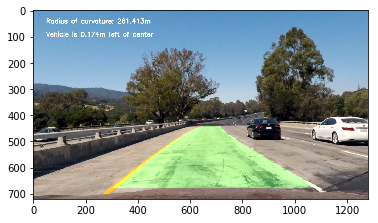

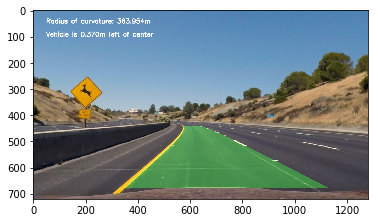

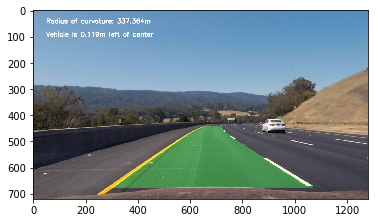

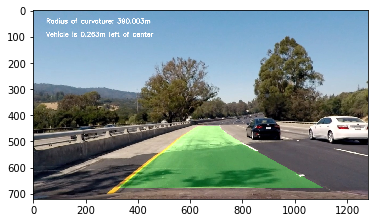

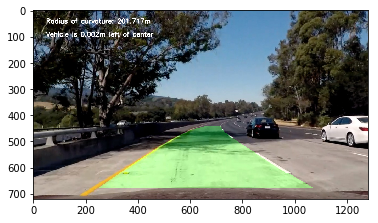

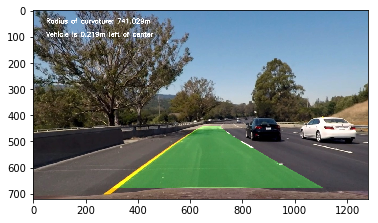

In [7]:
pickle_file = pickle.load(open('camera_cal.p', 'rb'))
mtx = pickle_file['mtx']
dist = pickle_file['dist']

images = ['test_images/test1.jpg',
          'test_images/test2.jpg', 
          'test_images/test3.jpg',
          'test_images/test4.jpg',
          'test_images/test5.jpg',
          'test_images/test6.jpg']

for imageName in images:
    image = mpimg.imread(imageName)
    height, width = image.shape[0], image.shape[1]

    src_points = pickle.load(open('transformation_points.p', 'rb'))
    x_offset = 320
    y_offset = 0
    dst_points = np.array([[x_offset, y_offset], 
                           [x_offset, height-y_offset], 
                           [width-x_offset, height-y_offset], 
                           [width-x_offset, y_offset]], dtype=np.float32)
    
    undist = cv2.undistort(image, mtx, dist)
#     plt.imsave('output_images/undistorted.jpg', undist)
    
    binary = Binarize(undist)
    binary_warped = warp_image(binary, src_points, dst_points)
    left_lane = Line()
    right_lane = Line()

    left, right = FindLanes(binary_warped, 0, left_lane, right_lane)

    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    # print (ploty.shape, left.recent_xfitted.shape)
    pts_left = np.array([np.transpose(np.vstack([left.recent_xfitted, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right.recent_xfitted, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    Minv = cv2.getPerspectiveTransform(dst_points, src_points)
    newwarp = cv2.warpPerspective(color_warp, Minv, binary_warped.shape[::-1]) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    # Radius of curvature
    display_string = 'Radius of curvature: {0:.3f}m'.format((left.radius_of_curvature + right.radius_of_curvature)/2)
    cv2.putText(result, display_string, (50, 50), 0, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
    # Vehivle position from the center line
    center_offset = left.line_base_pos
    if center_offset < 0:
        display_string = 'Vehicle is {0:.3f}m left of center'.format(abs(center_offset))
    elif center_offset >= 0:
        display_string = 'Vehicle is {0:.3f}m right of center'.format(abs(center_offset))
    cv2.putText(result, display_string, (50, 100), 0, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
    plt.imshow(result)
    plt.show()
#     plt.imsave('output_images/final.jpg', result)

In [8]:
pickle_file = pickle.load(open('camera_cal.p', 'rb'))
mtx = pickle_file['mtx']
dist = pickle_file['dist']
print ('Camera calibration data loaded')

src_points = pickle.load(open('transformation_points.p', 'rb'))

def process_image(img):
    height, width = img.shape[0], img.shape[1]
    undist = cv2.undistort(img, mtx, dist)
    x_offset = 320
    y_offset = 0
    dst_points = np.array([[x_offset, y_offset], 
                        [x_offset, height-y_offset], 
                        [width-x_offset, height-y_offset], 
                        [width-x_offset, y_offset]], dtype=np.float32)
    binary = Binarize(undist)
    binary_warped = warp_image(binary, src_points, dst_points)

    process_image.left, process_image.right = FindLanes(binary_warped, process_image.counter, process_image.left, process_image.right, n_history_frames=10, full_frame_detection=(process_image.counter == 0))
    process_image.counter += 1

    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
#     print (ploty.shape, process_image.left.recent_xfitted.shape)
    pts_left = np.array([np.transpose(np.vstack([process_image.left.recent_xfitted[process_image.counter-1], ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([process_image.right.recent_xfitted[process_image.counter-1], ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    Minv = cv2.getPerspectiveTransform(dst_points, src_points)
    newwarp = cv2.warpPerspective(color_warp, Minv, binary_warped.shape[::-1]) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    display_string = 'Radius of curvature: {0:.3f}m'.format((process_image.left.radius_of_curvature + process_image.right.radius_of_curvature)/2)
    cv2.putText(result, display_string, (50, 50), 0, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
    center_offset = process_image.left.line_base_pos
    if center_offset < 0:
        display_string = 'Vehicle is {0:.3f}m left of center'.format(abs(center_offset))
    elif center_offset >= 0:
        display_string = 'Vehicle is {0:.3f}m right of center'.format(abs(center_offset))
    cv2.putText(result, display_string, (50, 100), 0, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
    return result
process_image.counter = 0
process_image.left = Line()
process_image.right = Line()
white_output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)
clip1.reader.close()
clip1.audio.reader.close_proc()

Camera calibration data loaded
[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1260/1261 [03:46<00:00,  5.50it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 3min 47s
